# **Pembelajaran Mesin H**
### **Muhammad Aqil Farrukh / 502522158**
### **Tugas 3 Hierarchical Clustering**


1. Mensuppress Warnings: Kode pertama mendefinisikan sebuah fungsi warn() yang tidak melakukan apa-apa (pass). Kemudian, modul warnings diimpor, dan fungsi warn() yang telah didefinisikan sebelumnya digunakan untuk menggantikan fungsi warn bawaan dari modul tersebut. Hal ini dimaksudkan untuk menonaktifkan atau menyuppress pesan peringatan yang mungkin muncul selama eksekusi kode.

2. Import Libraries: Kode tersebut mengimpor beberapa library yang umum digunakan dalam analisis data dan pembelajaran mesin, termasuk:

* random: Untuk menghasilkan bilangan acak.
* numpy (diimpor sebagai np): Library yang digunakan untuk operasi numerik dan array.
* pandas (diimpor sebagai pd): Library yang digunakan untuk  manipulasi dan analisis data.
* matplotlib.pyplot (diimpor sebagai plt): Library yang digunakan untuk membuat visualisasi data.
* sklearn.cluster.KMeans: Kelas yang digunakan untuk melakukan klasterisasi dengan metode K-Means.
* sklearn.datasets.make_blobs: Fungsi yang digunakan untuk membuat dataset berbentuk blob (bercak) dengan berbagai properti tertentu.
3.  Inline Plotting: %matplotlib inline adalah sebuah magic command yang digunakan dalam lingkungan Jupyter Notebook atau IPython untuk menampilkan plot matplotlib di dalam notebook secara langsung setelah kode.

Dengan demikian, keseluruhan kode tersebut persiapan awal untuk melakukan analisis data dan klasterisasi dengan menggunakan K-Means, serta menampilkan visualisasi hasilnya di dalam notebook.`

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

### **Menggunakan dataset personality customer, dilakukan data preprocessing, EDA, dan K-Means Clustering, lalu analisis hasil K-Means**

In [2]:

dataF = pd.read_csv('marketing_campaign.csv',delimiter='\t')
dataF.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0



Baris kode dataF = pd.read_csv('marketing_campaing.csv') digunakan untuk membaca file CSV yang disebut 'marketing_campaing.csv' ke dalam sebuah DataFrame menggunakan fungsi read_csv dari modul pandas.

Kemudian, dataF.head() digunakan untuk menampilkan lima baris pertama dari DataFrame dataF.

Jadi, dengan menggunakan kode ini, kita mengimpor data dari file CSV ke dalam sebuah DataFrame dan kemudian menampilkan lima baris pertama dari DataFrame tersebut.

In [3]:
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Fungsi dataF.info() memberikan ringkasan singkat tentang struktur dan informasi dari DataFrame dataF. Ini mencakup beberapa informasi penting seperti:

Jumlah total baris (entries) dalam DataFrame.
Jumlah kolom (columns) dalam DataFrame.
Daftar nama kolom beserta tipe data masing-masing kolom.
Jumlah nilai non-null (non-missing) dalam setiap kolom.
Penggunaan memori oleh DataFrame.
Dengan menjalankan dataF.info(), kita akan mendapatkan pemahaman yang lebih baik tentang struktur dan isi dari DataFrame dataF, termasuk apakah terdapat nilai yang hilang (missing values) dalam dataset dan tipe data dari setiap kolomnya.

In [4]:
dataF.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


Kemudian panggilan dataF.describe(include='all') memberikan ringkasan statistik deskriptif dari DataFrame dataF, termasuk kolom-kolom dengan tipe data numerik dan kategorikal. Ini mencakup informasi seperti:

* Count: Jumlah entri non-null (non-missing) untuk setiap kolom.
* Mean: Rata-rata nilai untuk setiap kolom.
* Std: Standar deviasi dari nilai untuk setiap kolom.
* Min: Nilai minimum untuk setiap kolom.
* 25th, 50th, 75th percentile: Kuartil ke-25, ke-50 (median), dan ke-75 untuk setiap kolom.
* Max: Nilai maksimum untuk setiap kolom.

In [5]:
dataF.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Panggilan dataF.isnull().sum() digunakan untuk menghitung jumlah nilai yang hilang (missing values) dalam setiap kolom DataFrame dataF.

Misalnya, jika sebuah kolom memiliki nilai null, jumlahnya akan dihitung dan ditampilkan. Jika sebuah kolom tidak memiliki nilai null, maka jumlahnya akan nol.

In [6]:
dataF.duplicated().sum()

0

**Penjelasan Tentang Atribut Data**

Atribut Numerik:
1. Year_Birth: Tahun kelahiran pelanggan.
2. Income: Pendapatan tahunan pelanggan.
3. Kidhome: Jumlah anak di bawah usia 18 tahun di rumah tangga pelanggan.
4. Teenhome: Jumlah remaja di rumah tangga pelanggan.
5. Recency: Jumlah hari sejak pelanggan melakukan pembelian terakhir.
6. MntWines: Jumlah uang yang dihabiskan pelanggan untuk pembelian anggur.
7. MntFruits: Jumlah uang yang dihabiskan pelanggan untuk pembelian buah-buahan.
8. MntMeatProducts: Jumlah uang yang dihabiskan pelanggan untuk pembelian produk daging.
9. MntFishProducts: Jumlah uang yang dihabiskan pelanggan untuk pembelian produk ikan.
10. MntSweetProducts: Jumlah uang yang dihabiskan pelanggan untuk pembelian produk manis.
11. MntGoldProds: Jumlah uang yang dihabiskan pelanggan untuk pembelian produk emas.
12. NumDealsPurchases: Jumlah pembelian dengan diskon yang dilakukan pelanggan.
13. NumWebPurchases: Jumlah pembelian yang dilakukan pelanggan melalui website.
14. NumCatalogPurchases: Jumlah pembelian yang dilakukan pelanggan melalui katalog.
15. NumStorePurchases: Jumlah pembelian yang dilakukan pelanggan melalui toko fisik.
16. NumWebVisitsMonth: Jumlah kunjungan pelanggan ke website per bulan.
17. AcceptedCmp3: Apakah pelanggan menerima penawaran kampanye 3.
18. AcceptedCmp4: Apakah pelanggan menerima penawaran kampanye 4.
19. AcceptedCmp5: Apakah pelanggan menerima penawaran kampanye 5.
20. AcceptedCmp1: Apakah pelanggan menerima penawaran kampanye 1.
21. AcceptedCmp2: Apakah pelanggan menerima penawaran kampanye 2.
22. Complain: Apakah pelanggan mengajukan keluhan.
23. Z_CostContact: Biaya kontak.
24. Z_Revenue: Pendapatan dari pelanggan.

Atribut Kategorikal:
1. Education: Tingkat pendidikan pelanggan.
2. Marital_Status: Status perkawinan pelanggan.
3. Dt_Customer: Tanggal pelanggan bergabung.
4. Response: Respon pelanggan terhadap kampanye pemasaran.

**Permasalahan yang Terdapat pada Data:**

1. Terdapat banyak kolom, baik numerik maupun kategorikal, yang memiliki nilai null.
2. Beberapa atribut mungkin tidak relevan atau tidak akan digunakan dalam Analisis Eksplorasi Data (EDA) dan Klasterisasi K-Means.


### **PRE PROCESSING**

Preprocessing data adalah proses persiapan data sebelum dilakukan analisis lebih lanjut. Tujuan dari preprocessing data adalah untuk membersihkan, menormalkan, dan mempersiapkan data agar dapat digunakan secara efektif dalam model atau algoritma machine learning.

 **Data Reduction**: Tahap ini melibatkan pengurangan dimensi data untuk mengurangi kompleksitas dan mempercepat proses analisis atau model. Beberapa teknik yang dapat digunakan dalam tahap ini antara lain:
   - Principal Component Analysis (PCA): Mengurangi dimensi data dengan menggabungkan fitur-fitur yang saling berkorelasi.
   - Feature Extraction: Mengubah data menjadi representasi yang lebih sederhana dan informatif, seperti menggunakan metode seperti t-SNE atau LDA.



In [7]:
dataF['total_spend_product'] = dataF['MntWines'] + dataF['MntFruits'] + dataF['MntMeatProducts'] + dataF['MntFishProducts'] + dataF['MntSweetProducts'] + dataF['MntGoldProds']
dataF['total_spend_place'] = dataF['NumDealsPurchases'] + dataF['NumWebPurchases'] + dataF['NumCatalogPurchases'] + dataF['NumStorePurchases']
dataF['Rata-rata-belanja'] = round(dataF['total_spend_product'] / dataF['total_spend_place'],2)
dataF

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_spend_product,total_spend_place,Rata-rata-belanja
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,1617,25,64.68
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,27,6,4.50
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,776,21,36.95
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,53,8,6.62
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,422,19,22.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,1341,18,74.50
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,444,22,20.18
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,1241,19,65.32
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,843,23,36.65


1. `dataF['total_spend_product'] = dataF['MntWines'] + dataF['MntFruits'] + dataF['MntMeatProducts'] + dataF['MntFishProducts'] + dataF['MntSweetProducts'] + dataF['MntGoldProds']`: Pada baris ini,   membuat kolom baru dalam DataFrame `dataF` yang disebut `'total_spend_product'`. Kolom ini berisi total belanja produk dari kolom-kolom `'MntWines'`, `'MntFruits'`, `'MntMeatProducts'`, `'MntFishProducts'`, `'MntSweetProducts'`, dan `'MntGoldProds'`. Total belanja produk dihitung dengan menambahkan nilai belanja dari setiap kolom produk.

2. `dataF['total_spend_place'] = dataF['NumDealsPurchases'] + dataF['NumWebPurchases'] + dataF['NumCatalogPurchases'] + dataF['NumStorePurchases']`: Pada baris ini,   membuat kolom baru dalam DataFrame `dataF` yang disebut `'total_spend_place'`. Kolom ini berisi total belanja di tempat dari kolom-kolom `'NumDealsPurchases'`, `'NumWebPurchases'`, `'NumCatalogPurchases'`, dan `'NumStorePurchases'`. Total belanja di tempat dihitung dengan menambahkan nilai belanja dari setiap kolom tempat.

3. `dataF['Rata-rata-belanja'] = round(dataF['total_spend_product'] / dataF['total_spend_place'],2)`: Pada baris ini,   membuat kolom baru dalam DataFrame `dataF` yang disebut `'Rata-rata-belanja'`. Kolom ini berisi rata-rata belanja per tempat. Rata-rata belanja dihitung dengan membagi total belanja produk (kolom `'total_spend_product'`) dengan total belanja di tempat (kolom `'total_spend_place'`), dan hasilnya dibulatkan menjadi 2 angka desimal.

Dengan demikian, setelah menjalankan baris-baris kode di atas, DataFrame `dataF` akan memiliki tiga kolom baru: `'total_spend_product'`, `'total_spend_place'`, dan `'Rata-rata-belanja'`, yang masing-masing berisi total belanja produk, total belanja di tempat, dan rata-rata belanja per tempat.

**Data Cleaning**: Tahap ini melibatkan identifikasi dan penanganan masalah yang umum terjadi dalam data, seperti nilai yang hilang, data duplikat, format yang tidak tepat, dan outlier. Beberapa teknik yang dapat digunakan dalam tahap ini antara lain:
   - Menghapus baris atau kolom yang mengandung nilai yang hilang.
   - Mengisi nilai yang hilang dengan nilai rata-rata, median, atau modus.
   - Menghapus data duplikat.
   - Mendeteksi dan menangani outlier.

In [8]:
df = dataF[['Income','total_spend_place','Rata-rata-belanja']]
df['Rata-rata-belanja'] = df['Rata-rata-belanja'].replace(np.inf, np.nan)

Pada kode di atas, saya membuat DataFrame baru yang disebut `df`, yang berisi kolom `'Income'`, `'total_spend_place'`, dan `'Rata-rata-belanja'` dari DataFrame `dataF`. Kemudian, saya melakukan penggantian nilai infiniti (`np.inf`) dalam kolom `'Rata-rata-belanja'` dengan nilai NaN (`np.nan`). Ini dilakukan dengan menggunakan fungsi `replace` dari Pandas.

Penggantian ini biasanya dilakukan ketika terdapat hasil pembagian oleh nol, yang menghasilkan nilai infiniti. Dengan menggantinya dengan nilai NaN, ini memungkinkan untuk melakukan pemrosesan data lebih lanjut, seperti penghapusan baris yang mengandung nilai NaN atau pengisian nilai NaN dengan nilai lainnya.

In [9]:
df.isnull().sum()

Income               24
total_spend_place     0
Rata-rata-belanja     4
dtype: int64

Perintah `df.isnull().sum()` digunakan untuk menghitung jumlah nilai yang hilang (NaN) dalam setiap kolom DataFrame `df`. Ini akan memberikan output berupa jumlah nilai NaN dalam setiap kolom.

Saya dapat menjalankan perintah tersebut untuk mengetahui berapa banyak nilai NaN yang ada dalam DataFrame `df`. Misalnya:

```python
print(df.isnull().sum())
```

Dari output nya dapat diketahui bahwa Income masih memiliki 24 nilai nan atau kosong

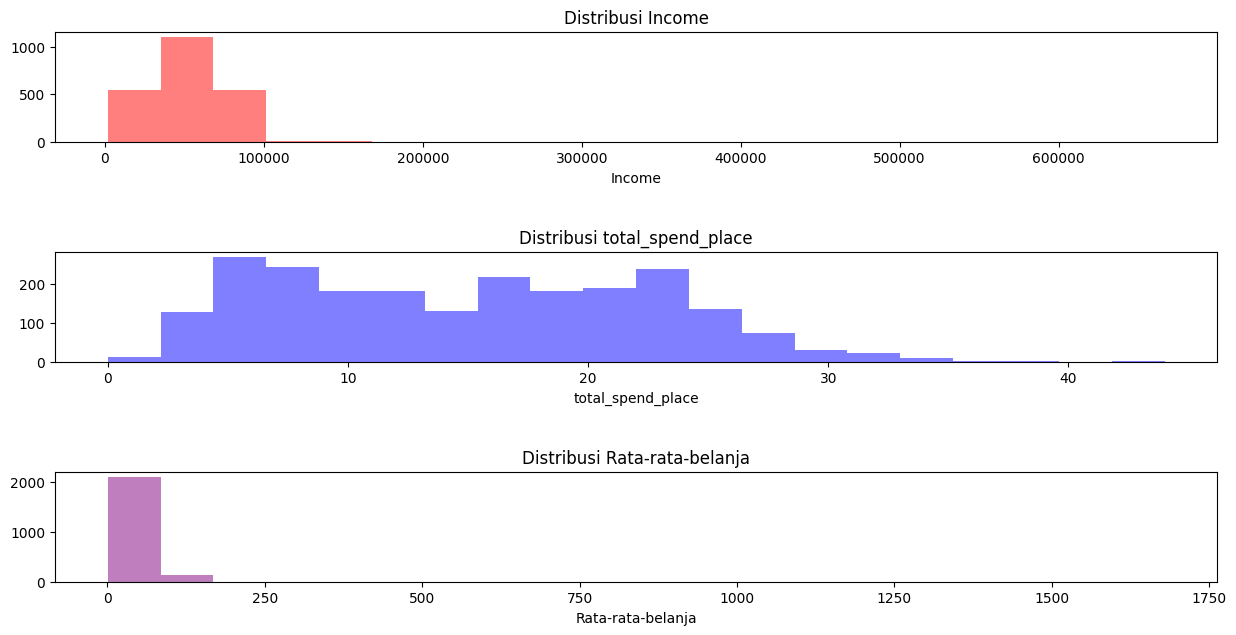

In [10]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.hist(df['Income'].dropna(), bins=20, color='red', alpha=0.5)
plt.title('Distribusi Income')
plt.xlabel('Income')

plt.subplot(4, 1, 2)
plt.hist(df['total_spend_place'].dropna(), bins=20, color='blue', alpha=0.5)
plt.title('Distribusi total_spend_place')
plt.xlabel('total_spend_place')

plt.subplot(4, 1, 3)
plt.hist(df['Rata-rata-belanja'].dropna(), bins=20, color='purple', alpha=0.5)
plt.title('Distribusi Rata-rata-belanja')
plt.xlabel('Rata-rata-belanja')

plt.subplots_adjust(hspace=1)  # Menambahkan jarak antar subplot secara vertikal

plt.show()


Pada kode di atas, saya menggunakan matplotlib untuk membuat subplot dengan tiga histogram yang menampilkan distribusi kolom 'Income', 'total_spend_place', dan 'Rata-rata-belanja' dari DataFrame `df`.

- Pertama, saya membuat sebuah figure dengan ukuran 15x10 menggunakan `plt.figure(figsize=(15, 10))`.
- Kemudian, saya menggunakan subplot untuk menempatkan tiga histogram secara vertikal. 
- Di setiap subplot, saya menggunakan `plt.hist()` untuk membuat histogram dari kolom yang sesuai. Saya menggunakan `dropna()` untuk menghapus nilai NaN sebelum membuat histogram. 
- Saya menggunakan `bins=20` untuk menentukan jumlah bin yang digunakan dalam histogram.
- Saya memberikan judul pada setiap subplot dengan menggunakan `plt.title()` dan menamai sumbu x dengan menggunakan `plt.xlabel()`.

Dengan menggunakan kode di atas, saya telah membuat tiga histogram yang menunjukkan distribusi dari kolom 'Income', 'total_spend_place', dan 'Rata-rata-belanja'. Setiap histogram ditempatkan dalam subplot yang berbeda secara vertikal.

Dan dapat diketahui dari output bahwa 
- Nilai Income tidak tersebar dengan rata , dan hanya ada data di bagian kiri saja sehingga pemerataan data paling cocok menggunakan mean atau rata rata
- Nilai total_spend_place memiliki persebaran yang ada di tengah dan hampir merata, maka yang paling cocok adalah median
- Nilai Rata-rata belanja tidak tersebar dengan rata , dan hanya ada data di bagian kiri saja sehingga pemerataan data paling cocok menggunakan mean atau rata rata



In [11]:
df['Income'].fillna(df['Income'].mean(), inplace=True)
df['total_spend_place'].fillna(df['total_spend_place'].median(), inplace=True)
df['Rata-rata-belanja'].fillna(df['Rata-rata-belanja'].mean(), inplace=True)
df.isnull().sum()

Income               0
total_spend_place    0
Rata-rata-belanja    0
dtype: int64

Pada kode di atas, saya melakukan pengisian nilai yang hilang (NaN) dalam kolom 'Income', 'total_spend_place', dan 'Rata-rata-belanja' dengan nilai rata-rata atau median dari kolom tersebut.

Berikut penjelasan langkah-langkahnya:

1. `df['Income'].fillna(df['Income'].mean(), inplace=True)`: Saya mengisi nilai NaN dalam kolom 'Income' dengan nilai rata-rata dari kolom tersebut menggunakan metode `.fillna()` dan `.mean()`. Dengan `inplace=True`, perubahan akan diterapkan langsung ke DataFrame `df`.

2. `df['total_spend_place'].fillna(df['total_spend_place'].median(), inplace=True)`: Saya mengisi nilai NaN dalam kolom 'total_spend_place' dengan nilai median dari kolom tersebut menggunakan metode `.fillna()` dan `.median()`. Kembali, `inplace=True` digunakan untuk menerapkan perubahan langsung ke DataFrame `df`.

3. `df['Rata-rata-belanja'].fillna(df['Rata-rata-belanja'].mean(), inplace=True)`: Saya mengisi nilai NaN dalam kolom 'Rata-rata-belanja' dengan nilai rata-rata dari kolom tersebut menggunakan metode `.fillna()` dan `.mean()`. Seperti sebelumnya, `inplace=True` digunakan untuk menerapkan perubahan langsung ke DataFrame `df`.

4. `df.isnull().sum()`: Terakhir, saya menggunakan `.isnull().sum()` untuk memeriksa apakah masih ada nilai NaN dalam DataFrame `df` setelah pengisian nilai. Ini akan memberikan output berupa jumlah nilai NaN dalam setiap kolom DataFrame.

Dengan menggunakan langkah-langkah di atas, saya berhasil mengisi nilai yang hilang dalam DataFrame `df` dan memeriksa apakah masih ada nilai NaN yang tersisa.

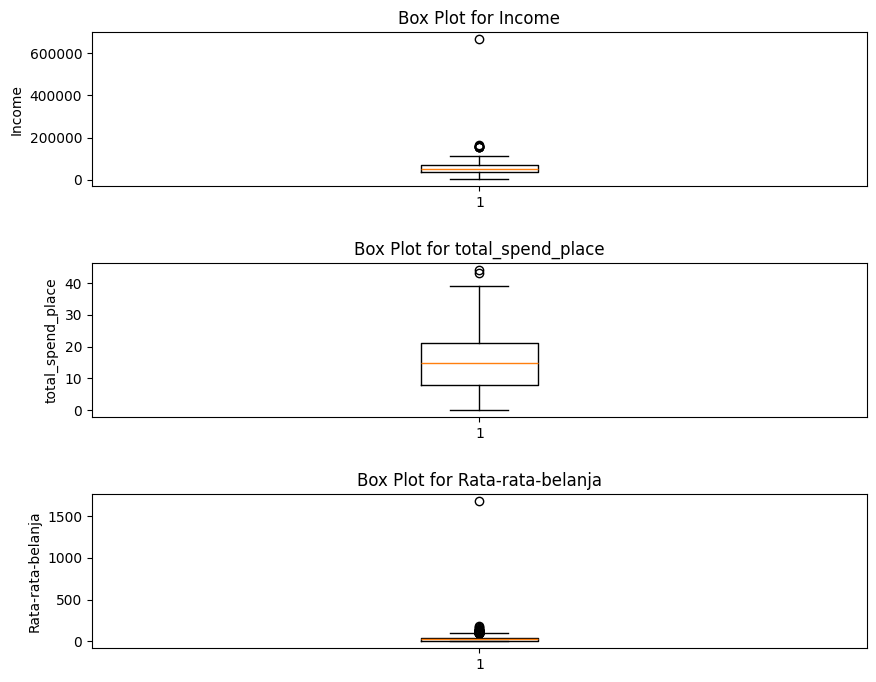

In [12]:
from scipy import stats
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(df):
    axes[i].boxplot(df[column])
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

plt.show()

Pada kode di atas, saya menggunakan library `scipy.stats` untuk mengimport fungsi `boxplot`, dan kemudian membuat subplots berdasarkan kolom dalam DataFrame `df` menggunakan `plt.subplots()`.

Berikut penjelasan langkah-langkahnya:

1. Saya menggunakan `plt.subplots(nrows=3, ncols=1, figsize=(10, 8))` untuk membuat tiga subplot secara vertikal dengan satu kolom. Ukuran figur ditetapkan menjadi (10, 8) dengan `figsize=(10, 8)` dan mengatur jarak antar subplot menggunakan `fig.subplots_adjust(hspace=0.5)`.

2. Melalui loop `for`, saya melakukan iterasi melalui setiap kolom dalam DataFrame `df` dan membuat boxplot untuk setiap kolom menggunakan `axes[i].boxplot(df[column])`. Di sini, `i` adalah indeks subplot yang sesuai dengan kolom saat ini.

3. Saya menambahkan judul untuk setiap subplot dengan menggunakan `axes[i].set_title(f'Box Plot for {column}')`, di mana `{column}` adalah nama kolom yang sedang diproses.

4. Saya menambahkan label sumbu y untuk setiap subplot dengan menggunakan `axes[i].set_ylabel(column)`, di mana `column` adalah nama kolom yang sedang diproses.

5. Terakhir, saya menampilkan plot menggunakan `plt.show()`.

Dengan menggunakan langkah-langkah di atas, saya berhasil membuat boxplot untuk setiap kolom dalam DataFrame `df`. Boxplot digunakan untuk menunjukkan distribusi data dan mendeteksi keberadaan outlier. Outlier adalah nilai-nilai yang jauh dari kebanyakan data dan bisa menjadi indikasi anomali atau kesalahan pengukuran. Dengan melihat boxplot, kita dapat mengidentifikasi potensi outlier dalam data dan mempertimbangkan tindakan yang tepat untuk mengatasi mereka.

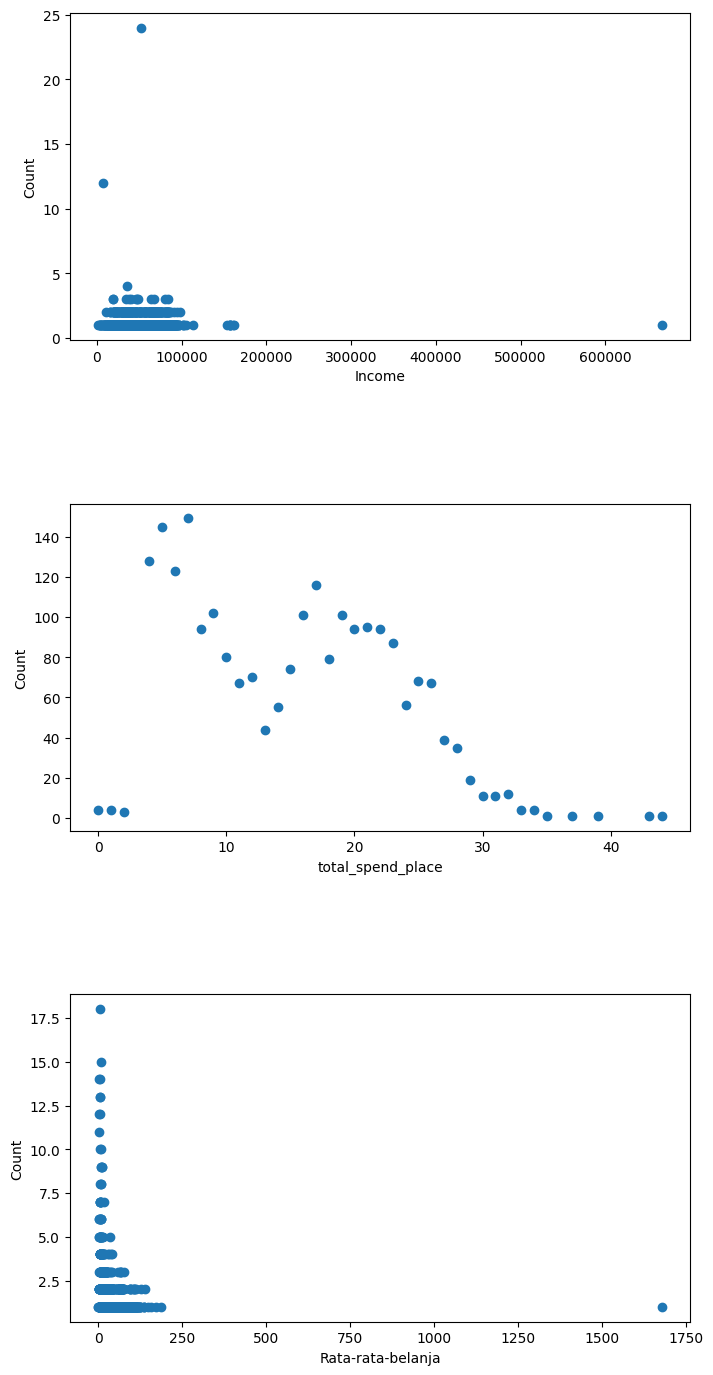

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 17))
fig.subplots_adjust(hspace=0.5, wspace=0.6)

for i, col in enumerate(df):
    counts = df[col].value_counts()
    axes[i].scatter(counts.index, counts.values)
    
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')

plt.show()

Pada kode di atas, saya menggunakan `plt.subplots()` untuk membuat tiga subplot secara vertikal dengan satu kolom. Ukuran figur ditetapkan menjadi (8, 17) dengan `figsize=(8, 17)` dan mengatur jarak antar subplot menggunakan `fig.subplots_adjust(hspace=0.5, wspace=0.6)`.

Berikut adalah penjelasan lebih lanjut:

1. Melalui loop `for`, saya melakukan iterasi melalui setiap kolom dalam DataFrame `df`.
   
2. Di dalam loop, saya menggunakan `df[col].value_counts()` untuk menghitung frekuensi kemunculan setiap nilai dalam kolom tersebut.

3. Saya menggunakan `axes[i].scatter(counts.index, counts.values)` untuk membuat scatter plot dari nilai-nilai dan frekuensinya. `counts.index` adalah nilai-nilai unik dalam kolom, sedangkan `counts.values` adalah frekuensi kemunculan masing-masing nilai.

4. Saya menambahkan label sumbu x untuk setiap subplot dengan menggunakan `axes[i].set_xlabel(f'{col}')`, di mana `{col}` adalah nama kolom yang sedang diproses.

5. Saya menambahkan label sumbu y untuk setiap subplot dengan menggunakan `axes[i].set_ylabel('Count')`.

6. Terakhir, saya menampilkan plot menggunakan `plt.show()`.

Dengan menggunakan langkah-langkah di atas, saya berhasil membuat scatter plot yang menunjukkan frekuensi kemunculan setiap nilai dalam setiap kolom DataFrame `df`. Scatter plot ini membantu kita memvisualisasikan distribusi nilai-nilai dalam setiap kolom.

In [14]:
from scipy import stats

z_scores = stats.zscore(df)
clean_df = df[(z_scores < 2.5).all(axis=1)]
clean_df.shape

(2224, 3)

Pada kode di atas, saya menggunakan modul `scipy.stats` untuk menghitung skor Z dari setiap data dalam DataFrame `df`.

Berikut adalah penjelasan langkah-langkahnya:

1. `z_scores = stats.zscore(df)`: Saya menggunakan fungsi `zscore()` dari modul `scipy.stats` untuk menghitung skor Z dari setiap data dalam DataFrame `df`. Skor Z adalah ukuran seberapa jauh sebuah titik data dari rata-rata dalam satuan deviasi standar.

2. `clean_df = df[(z_scores < 2.5).all(axis=1)]`: Saya membuat DataFrame baru yang disebut `clean_df` yang hanya berisi baris-baris dari DataFrame `df` di mana semua nilai skor Z dalam baris tersebut kurang dari 2.5. Ini dilakukan dengan menggunakan ekspresi boolean `(z_scores < 2.5).all(axis=1)` untuk memeriksa apakah semua nilai skor Z dalam setiap baris kurang dari 2.5. `all(axis=1)` menjamin bahwa semua elemen dalam setiap baris memenuhi kondisi yang ditetapkan.

3. `clean_df.shape`: Saya menggunakan atribut `shape` untuk menghitung jumlah baris dan kolom dalam DataFrame `clean_df`. Ini memberikan output berupa tuple yang menunjukkan jumlah baris dan kolom dalam DataFrame yang telah dibersihkan.

Dengan langkah-langkah di atas, saya telah membersihkan DataFrame `df` dari nilai-nilai yang dianggap sebagai outlier berdasarkan skor Z dengan batas 2.5. DataFrame yang telah dibersihkan disimpan dalam `clean_df`.

### Dan berikut adalah hasil visualisasi data setelah di cleaning yang meliputi pembersihan outlier

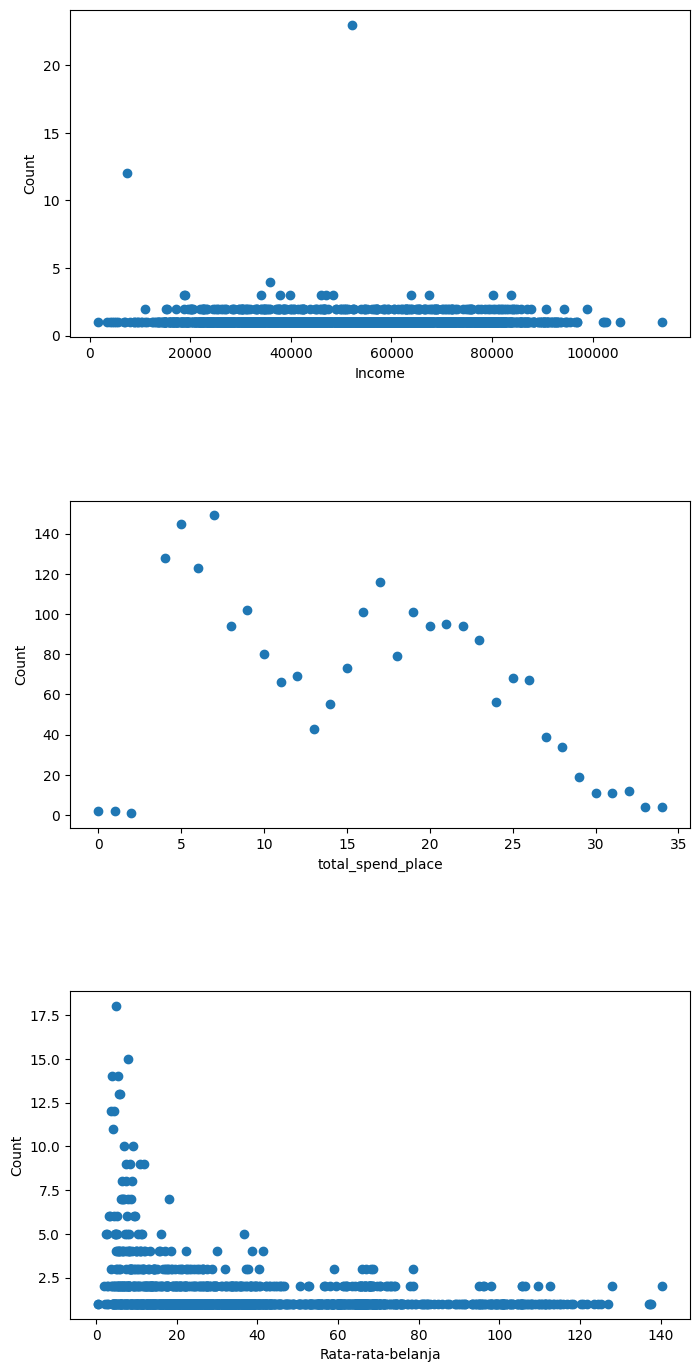

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 17))
fig.subplots_adjust(hspace=0.5, wspace=0.6)

for i, col in enumerate(clean_df):
    counts = clean_df[col].value_counts()
    axes[i].scatter(counts.index, counts.values)
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')

plt.show()

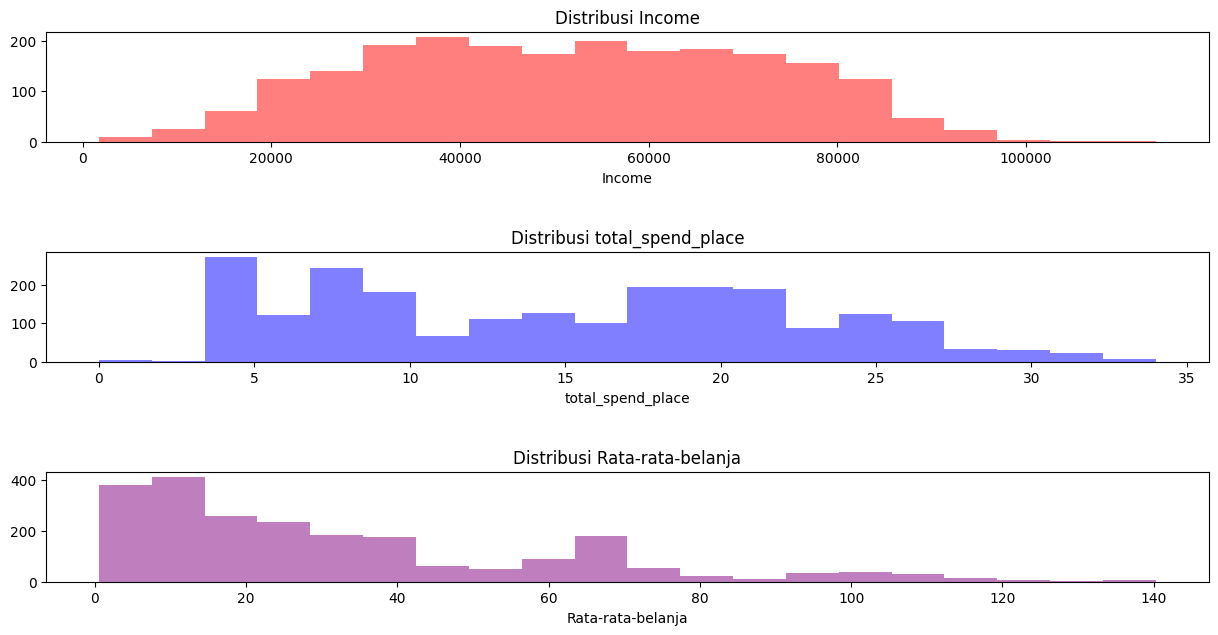

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.hist(clean_df['Income'].dropna(), bins=20, color='red', alpha=0.5)
plt.title('Distribusi Income')
plt.xlabel('Income')

plt.subplot(4, 1, 2)
plt.hist(clean_df['total_spend_place'].dropna(), bins=20, color='blue', alpha=0.5)
plt.title('Distribusi total_spend_place')
plt.xlabel('total_spend_place')

plt.subplot(4, 1, 3)
plt.hist(clean_df['Rata-rata-belanja'].dropna(), bins=20, color='purple', alpha=0.5)
plt.title('Distribusi Rata-rata-belanja')
plt.xlabel('Rata-rata-belanja')

plt.subplots_adjust(hspace=1)  # Menambahkan jarak antar subplot secara vertikal

plt.show()


In [17]:
df = clean_df
df

,Income,total_spend_place,Rata-rata-belanja
0,58138.0,25,64.68
1,46344.0,6,4.50
2,71613.0,21,36.95
3,26646.0,8,6.62
4,58293.0,19,22.21
...,...,...,...
2235,61223.0,18,74.50
2236,64014.0,22,20.18
2237,56981.0,19,65.32
2238,69245.0,23,36.65


## **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) adalah suatu pendekatan analisis data yang digunakan untuk memahami karakteristik utama dari dataset yang diberikan. Tujuan utama dari EDA adalah untuk mengungkapkan struktur dan pola dalam data melalui teknik visualisasi dan ringkasan statistik. Ini membantu analis data untuk memahami sifat-sifat intrinsik dari data, menemukan hubungan antara variabel, mengidentifikasi anomali atau pola menarik, dan merumuskan hipotesis yang mungkin untuk diuji lebih lanjut.

Beberapa teknik umum yang digunakan dalam EDA meliputi:
- Visualisasi data: seperti histogram, scatter plot, box plot, dan heatmaps untuk menampilkan distribusi, hubungan, dan pola dalam data.
- Statistik deskriptif: seperti mean, median, standar deviasi, dan persentil untuk memberikan ringkasan statistik tentang data.
- Analisis korelasi: untuk mengeksplorasi hubungan antara variabel menggunakan koefisien korelasi atau metode lainnya.
- Analisis frekuensi: untuk memahami distribusi dan frekuensi kemunculan nilai-nilai dalam variabel kategorikal.

EDA merupakan langkah awal yang penting dalam proses analisis data, karena membantu untuk mengidentifikasi pertanyaan yang relevan, menentukan metode analisis yang sesuai, dan menghasilkan wawasan awal yang dapat digunakan untuk pengambilan keputusan lebih lanjut.


**1. Feature Understanding**

Feature understanding adalah proses memahami variabel atau fitur (features) yang ada dalam dataset. Ini melibatkan pemahaman mendalam tentang setiap variabel, termasuk karakteristik, makna, dan pengaruhnya terhadap fenomena yang diamati.

In [18]:
df

,Income,total_spend_place,Rata-rata-belanja
0,58138.0,25,64.68
1,46344.0,6,4.50
2,71613.0,21,36.95
3,26646.0,8,6.62
4,58293.0,19,22.21
...,...,...,...
2235,61223.0,18,74.50
2236,64014.0,22,20.18
2237,56981.0,19,65.32
2238,69245.0,23,36.65


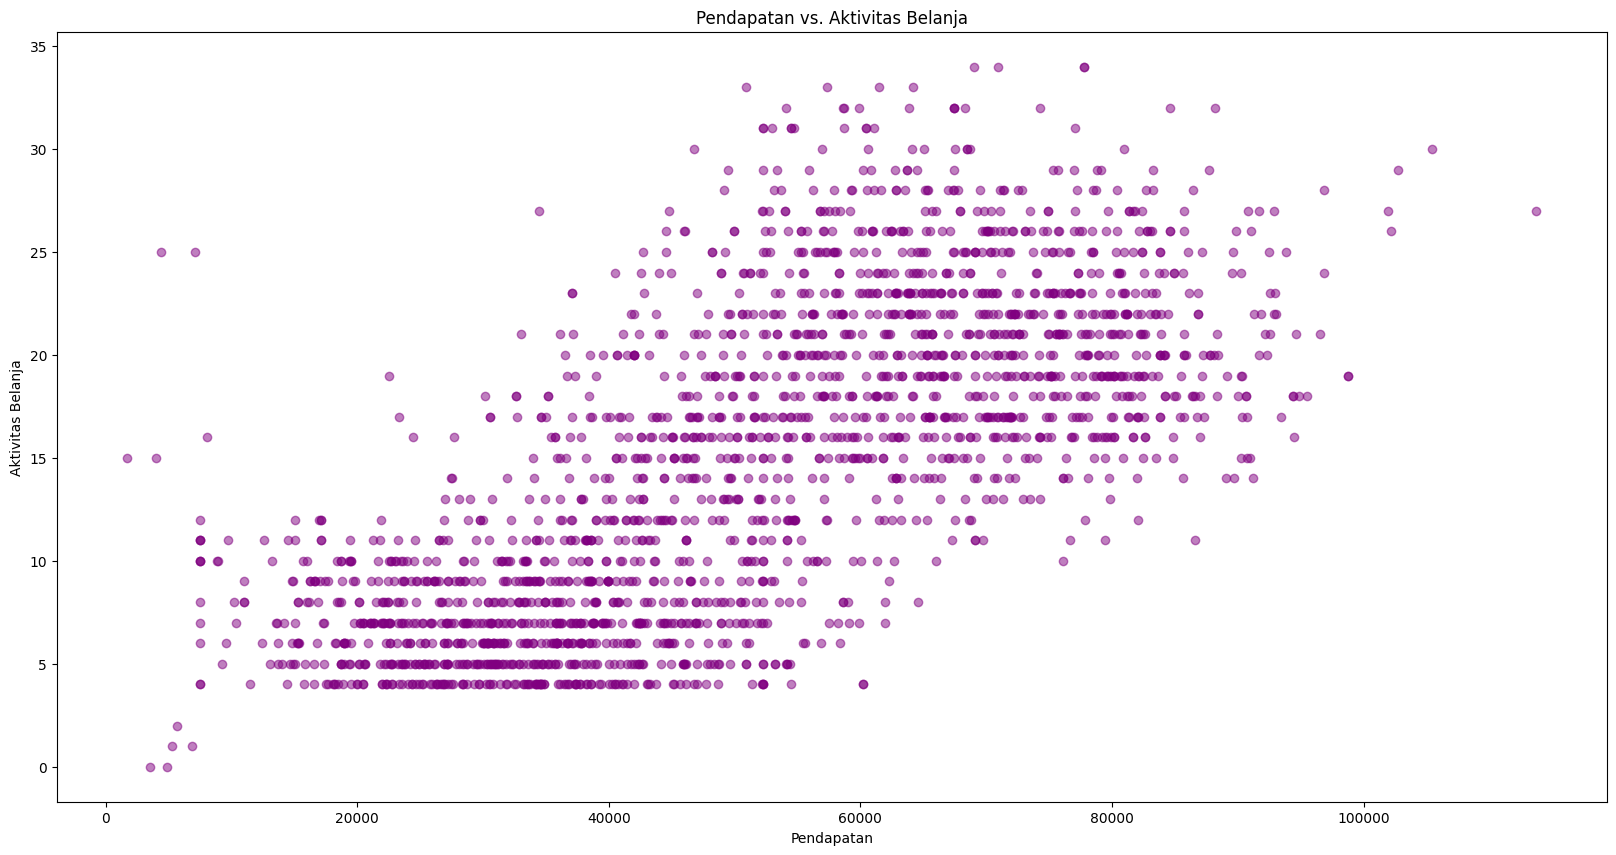

In [19]:
plt.figure(figsize=(20, 10))

plt.scatter(df['Income'], df['total_spend_place'], alpha=0.5, c='purple')
plt.title('Pendapatan vs. Aktivitas Belanja')
plt.xlabel('Pendapatan')
plt.ylabel('Aktivitas Belanja')
plt.show()

1. `plt.figure(figsize=(20, 10))`: Baris ini membuat gambar (figure) baru dengan ukuran 20x10 inci. Ini menyiapkan "canvas" di mana plot akan dibuat.

2. `plt.scatter(df['Income'], df['total_spend_place'], alpha=0.5, c='purple')`: Ini adalah perintah untuk membuat scatter plot. `df['Income']` adalah sumbu x, dan `df['total_spend_place']` adalah sumbu y. Setiap titik dalam plot ini akan mewakili pasangan nilai dari pendapatan dan total belanja di tempat tertentu. `alpha=0.5` mengatur transparansi titik menjadi setengah (50%), dan `c='purple'` mengatur warna titik menjadi ungu.

3. `plt.title('Pendapatan vs. Aktivitas Belanja')`: Ini memberikan judul untuk plot, dengan judul "Pendapatan vs. Aktivitas Belanja".

4. `plt.xlabel('Pendapatan')`: Ini memberi label sumbu x sebagai "Pendapatan".

5. `plt.ylabel('Aktivitas Belanja')`: Ini memberi label sumbu y sebagai "Aktivitas Belanja".

6. `plt.show()`: Ini menampilkan plot yang telah dibuat.

Grafik diatas menunjukkan perbandingan antara income buyer dengan frekuensi aktivitas belanja.

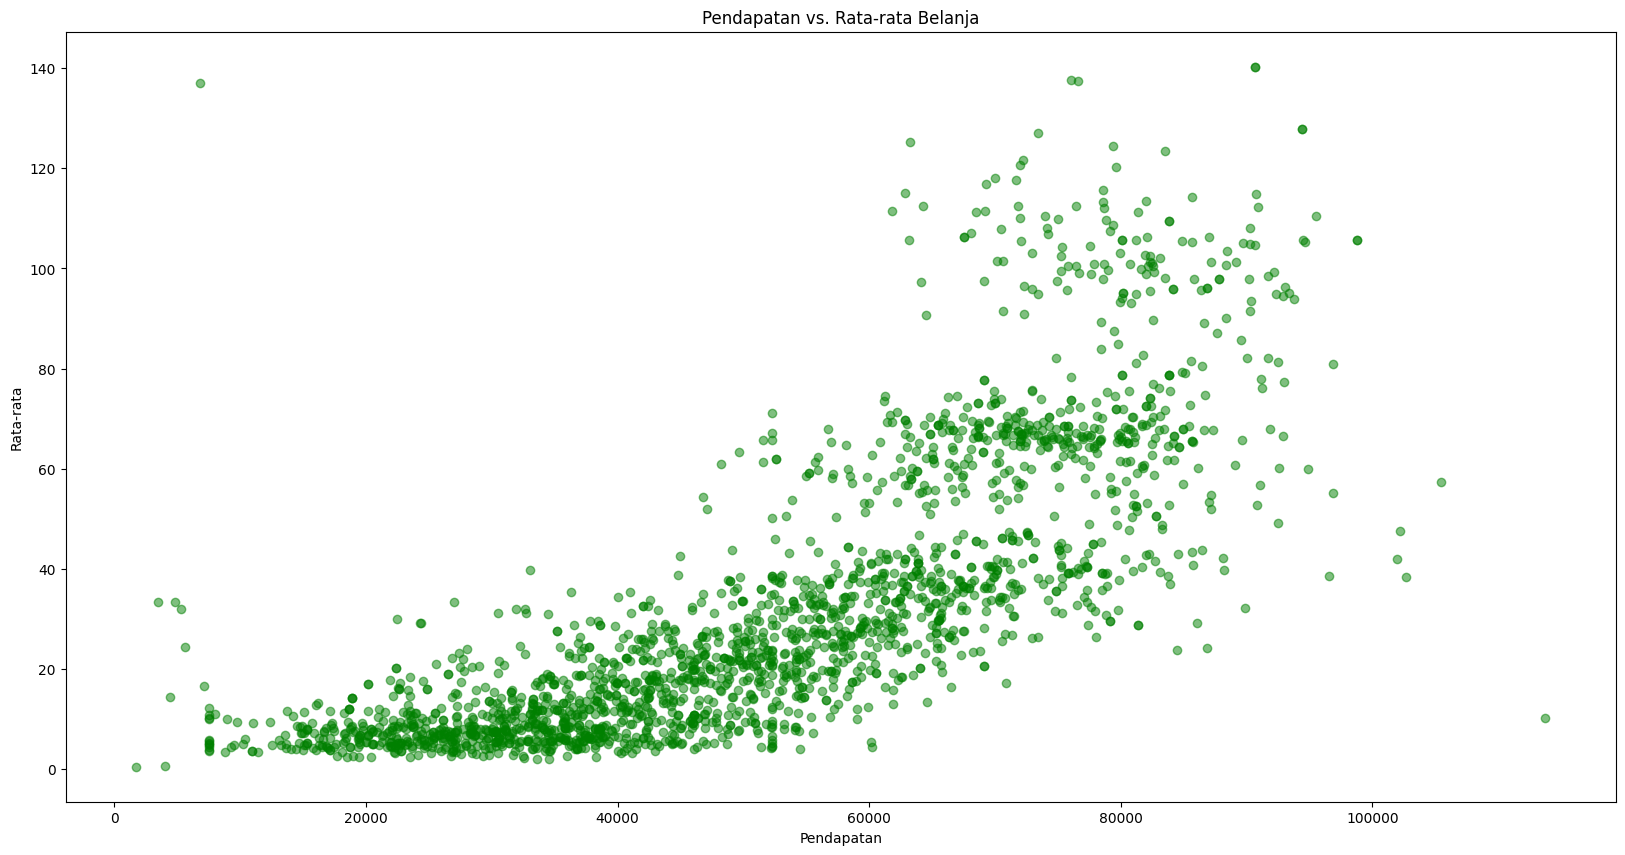

In [20]:
plt.figure(figsize=(20, 10))

plt.scatter(df['Income'], df['Rata-rata-belanja'], alpha=0.5, c='green')
plt.title('Pendapatan vs. Rata-rata Belanja')
plt.xlabel('Pendapatan')
plt.ylabel('Rata-rata')
plt.show()

1. `plt.figure(figsize=(20, 10))`: Ini adalah perintah untuk membuat sebuah gambar (figure) dengan ukuran 20x10 inci. Ini akan menjadi gambar di mana kita akan membuat plot data kita.

2. `plt.scatter(df['Income'], df['Rata-rata-belanja'], alpha=0.5, c='green')`: Di sini, kita menggunakan `plt.scatter` untuk membuat scatter plot. Kita menyediakan data untuk sumbu x dan y, yang diambil dari kolom 'Income' dan 'Rata-rata-belanja' dari dataframe `df`. Argumen `alpha=0.5` mengatur transparansi titik-titik scatter plot, sedangkan `c='green'` mengatur warna titik-titiknya menjadi hijau.

3. `plt.title('Pendapatan vs. Rata-rata Belanja')`: Ini menetapkan judul untuk plot kita, yaitu 'Pendapatan vs. Rata-rata Belanja'.

4. `plt.xlabel('Pendapatan')`: Ini menambahkan label sumbu x, yang diberi nama 'Pendapatan'. Ini membantu dalam memberikan informasi tentang apa yang diwakili oleh sumbu x.

5. `plt.ylabel('Rata-rata')`: Ini menambahkan label sumbu y, yang diberi nama 'Rata-rata'. Ini membantu dalam memberikan informasi tentang apa yang diwakili oleh sumbu y.

6. `plt.show()`: Perintah ini menampilkan plot yang telah kita buat. Setelah baris ini dieksekusi, Anda akan melihat plot scatter yang telah dibuat dengan judul dan label sumbu yang sesuai.

Dengan demikian, kode ini adalah untuk membuat sebuah scatter plot yang membandingkan pendapatan dengan rata-rata belanja dari data yang dimuat ke dalam dataframe `df`.

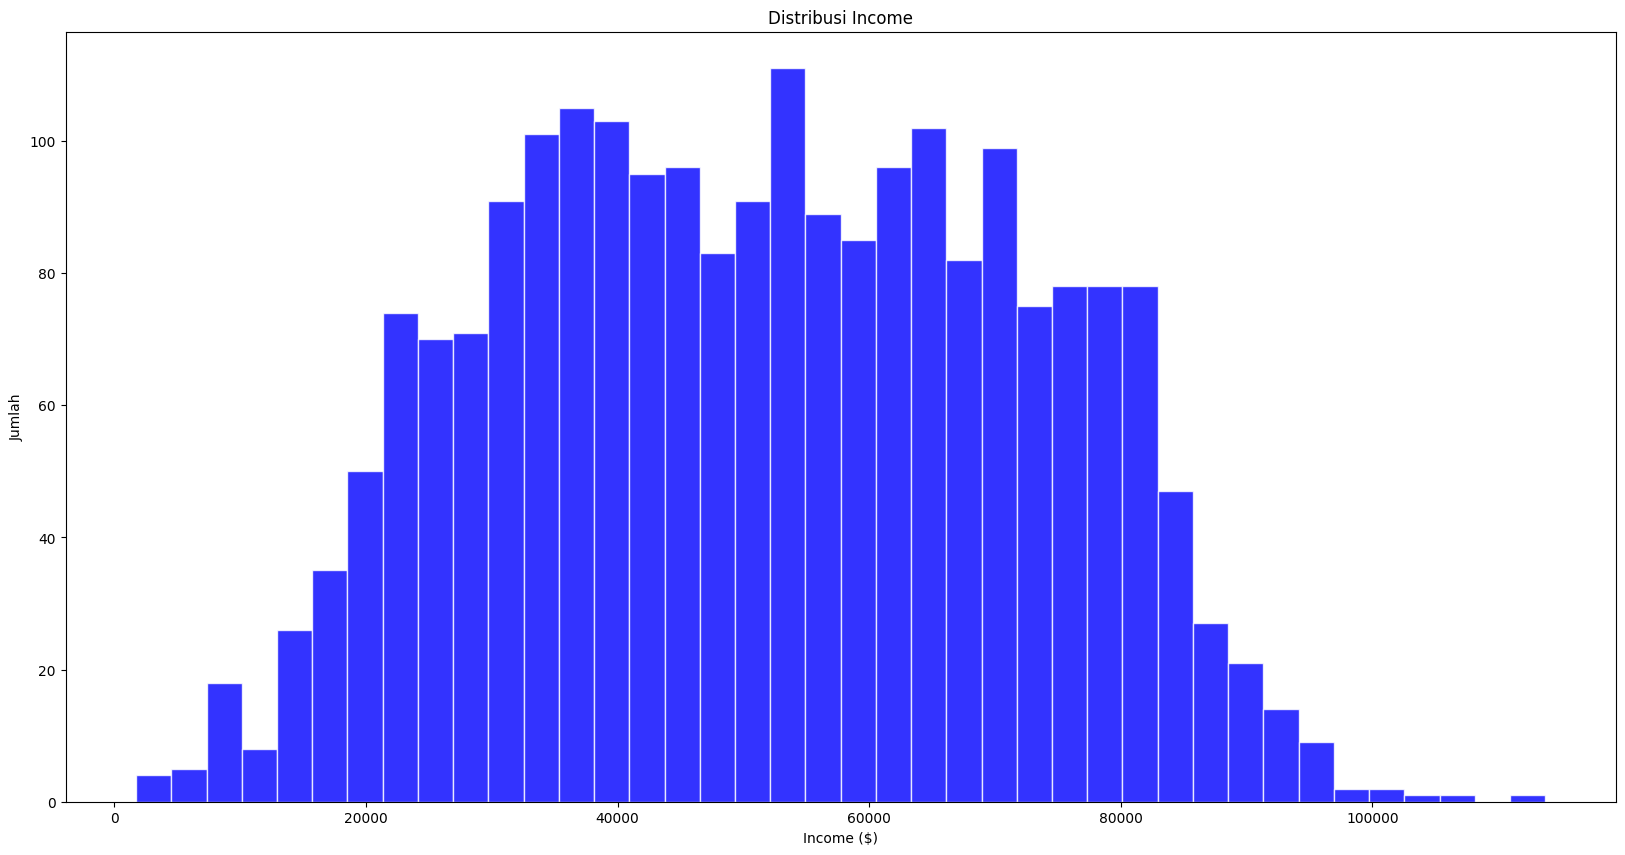

In [21]:
plt.figure(figsize=(20, 10))

plt.hist(df['Income'], alpha=0.8, bins=40, color='blue', edgecolor='white')
plt.title('Distribusi Income')
plt.xlabel('Income ($)')
plt.ylabel('Jumlah')
plt.show()

1. `plt.figure(figsize=(20, 10))`: Saya membuat sebuah gambar (figure) dengan ukuran 20x10 inci, di mana nanti saya akan membuat plot histogram.

2. `plt.hist(df['Income'], alpha=0.8, bins=40, color='blue', edgecolor='white', rwidth=10.0)`: Saya menggunakan `plt.hist()` untuk membuat histogram dari data pendapatan (kolom 'Income') yang diambil dari dataframe `df`. Parameter `alpha=0.8` mengatur transparansi histogram menjadi 80%. `bins=40` menetapkan jumlah bin (kelompok) data menjadi 40. Warna bar histogram diatur menjadi biru dengan `color='blue'`, dan tepi bar diberi warna putih dengan `edgecolor='white'`. Kemudian, saya menambahkan argumen `rwidth=10.0` untuk mengontrol lebar relatif dari setiap bar dalam histogram. Dengan nilai `rwidth=10.0`, lebar setiap bar akan menjadi 10.0, yang akan membuatnya saling tumpang tindih dan tidak memberikan tampilan yang baik pada plot.

3. `plt.title('Distribusi Income')`: Saya menambahkan judul ke plot histogram yang menggambarkan distribusi pendapatan.

4. `plt.xlabel('Income ($)')`: Saya memberikan label sumbu x sebagai "Income ($)", yang menjelaskan bahwa sumbu x mewakili data pendapatan dalam dolar.

5. `plt.ylabel('Jumlah')`: Saya memberikan label sumbu y sebagai "Jumlah", yang menjelaskan bahwa sumbu y mewakili jumlah frekuensi atau jumlah data.

6. `plt.show()`: Saya menampilkan plot histogram yang telah saya buat.


Dengan demikian, potongan kode tersebut menghasilkan histogram yang memvisualisasikan distribusi Income dalam dataset. Histogram ini membantu dalam pemahaman tentang sebaran Income dan frekuensi kemunculan nilai-nilai Income dalam data.

**2. Correlation Matrix**

Matriks korelasi adalah representasi visual dari hubungan antara variabel dalam sebuah dataset. Ini adalah tabel yang menunjukkan koefisien korelasi antara setiap pasangan variabel dalam dataset. Koefisien korelasi mengukur seberapa erat hubungan linier antara dua variabel, dengan nilai yang berkisar antara -1 hingga 1:

- Nilai 1 menunjukkan korelasi positif sempurna, yang berarti bahwa kedua variabel bergerak searah secara linier.
- Nilai -1 menunjukkan korelasi negatif sempurna, yang berarti bahwa kedua variabel bergerak berlawanan arah secara linier.
- Nilai 0 menunjukkan tidak adanya korelasi linier antara variabel, meskipun bisa saja ada hubungan non-linier.

Matriks korelasi biasanya disajikan dalam bentuk tabel persegi, di mana setiap sel diisi dengan koefisien korelasi antara dua variabel yang sesuai. Seringkali, matriks korelasi diwakili secara visual dengan warna, di mana nilai yang lebih tinggi atau lebih positif ditampilkan dengan warna yang lebih terang, sementara nilai yang lebih rendah atau lebih negatif ditampilkan dengan warna yang lebih gelap.

Matriks korelasi adalah alat yang berguna dalam analisis data karena membantu dalam mengidentifikasi hubungan antara variabel, memahami pola dalam data, dan menentukan variabel mana yang paling berpengaruh dalam menjelaskan variasi dalam dataset. Ini juga dapat digunakan untuk memilih variabel yang paling relevan dalam pemodelan statistik atau machine learning.

<Axes: >

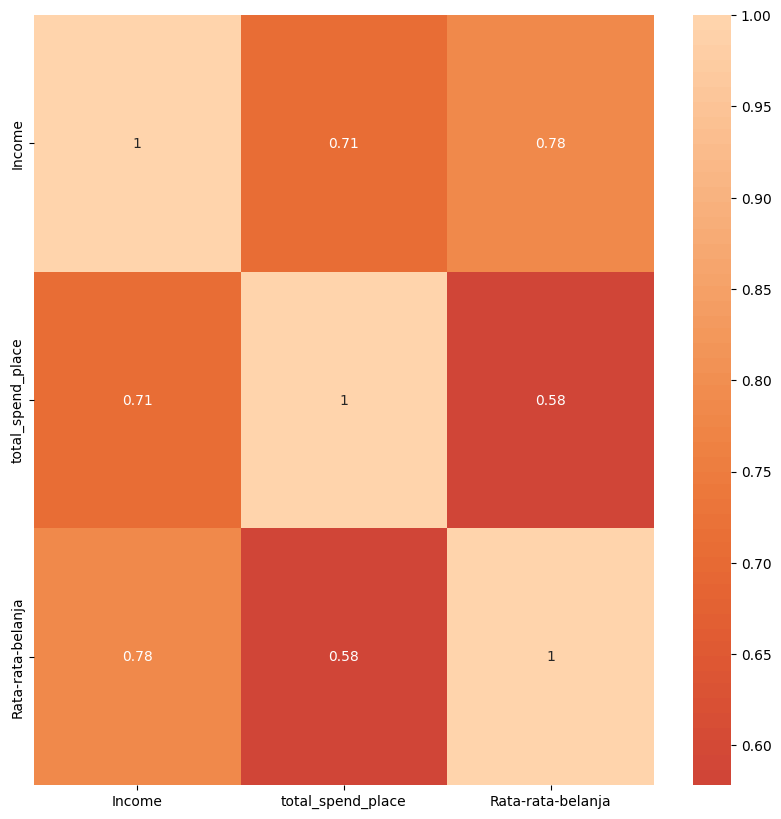

In [22]:
import seaborn as sns
corrmat= df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,annot=True, center=0)

Pada kode di atas, saya menggunakan library `seaborn` untuk membuat heatmap dari matriks korelasi antar kolom dalam DataFrame `df`.

Berikut adalah penjelasan langkah-langkahnya:

1. `corrmat = df.corr()`: Saya menggunakan metode `.corr()` pada DataFrame `df` untuk menghitung matriks korelasi antar kolom. Matriks korelasi ini berisi koefisien korelasi antar setiap pasang kolom dalam DataFrame.

2. `plt.figure(figsize=(10,10))`: Saya membuat figur dengan ukuran 10x10 menggunakan `plt.figure(figsize=(10,10))`. Hal ini bertujuan untuk menyesuaikan ukuran heatmap agar lebih mudah dibaca.

3. `sns.heatmap(corrmat, annot=True, center=0)`: Saya menggunakan fungsi `heatmap()` dari library `seaborn` untuk membuat heatmap dari matriks korelasi `corrmat`. Parameter `annot=True` digunakan untuk menampilkan nilai koefisien korelasi di dalam sel heatmap. Parameter `center=0` digunakan untuk menetapkan warna tengah heatmap pada nilai 0, sehingga memudahkan interpretasi korelasi positif dan negatif.

Dengan langkah-langkah di atas, saya berhasil membuat heatmap yang menunjukkan korelasi antar kolom dalam DataFrame `df`. heatmap ini memberikan visualisasi yang berguna untuk memahami hubungan antar variabel dalam dataset.

Berdasarkan nilai korelasi yang diberikan dari hasil visualisasi data:

1. Korelasi 0.78: Ini menunjukkan adanya hubungan positif yang cukup kuat antara kedua variabel tersebut. Meskipun tidak sempurna, hubungan ini masih dianggap cukup signifikan. Jika terdapat korelasi 0.78 antara dua variabel A dan B, maka ketika nilai A naik, kemungkinan besar nilai B juga akan naik, dan sebaliknya.

2. Korelasi 0.58: Ini juga menunjukkan adanya hubungan positif antara kedua variabel, tetapi hubungannya mungkin tidak sekuat korelasi sebelumnya (0.78). Meskipun demikian, masih terdapat hubungan yang signifikan di antara keduanya. Jika terdapat korelasi 0.58 antara dua variabel A dan B, maka terdapat kemungkinan bahwa perubahan dalam nilai A akan diikuti oleh perubahan dalam nilai B, tetapi hubungannya mungkin tidak sekuat korelasi 0.78.

3. Korelasi 1: Ini menunjukkan korelasi sempurna atau korelasi linier positif penuh. Hal ini menandakan bahwa kedua variabel memiliki hubungan linier positif yang sempurna. Artinya, jika terdapat korelasi 1 antara dua variabel A dan B, setiap perubahan dalam nilai A akan disertai oleh perubahan yang sama persis dalam nilai B. Ini menandakan hubungan yang sangat kuat di antara keduanya.

## **K-MEANS**

K-Means adalah salah satu algoritma clustering yang paling umum digunakan dalam analisis data. Tujuan utama dari algoritma K-Means adalah untuk membagi dataset menjadi kelompok-kelompok yang homogen, yang disebut sebagai cluster, di mana setiap data dalam sebuah cluster memiliki karakteristik yang serupa. 

Berikut adalah prinsip dasar dari algoritma K-Means:

1. **Inisialisasi centroid**: Algoritma dimulai dengan menginisialisasi centroid (titik pusat) sebanyak K di dalam ruang fitur. Centroid ini adalah representasi dari pusat masing-masing cluster.

2. **Assignment**: Setiap data dalam dataset akan diberikan kepada cluster yang memiliki centroid terdekat dengan data tersebut. Jarak antara data dan centroid dapat diukur menggunakan berbagai metrik jarak, seperti jarak Euclidean.

3. **Pembaruan centroid**: Setelah setiap data diberikan kepada cluster yang sesuai, centroid baru dihitung untuk setiap cluster dengan mengambil rata-rata dari semua data dalam cluster tersebut.

4. **Iterasi**: Langkah 2 dan 3 diulangi sampai tidak ada perubahan dalam penugasan cluster atau hingga iterasi mencapai batas yang ditentukan sebelumnya.

5. **Konvergensi**: Algoritma konvergen ketika tidak ada lagi perubahan dalam penugasan cluster. Pada titik ini, K-Means telah menemukan pengelompokan optimal (atau sub-optimal) untuk dataset yang diberikan.

K-Means memiliki beberapa keunggulan, termasuk sederhana dan efisien dalam mengelompokkan data. Namun, algoritma ini juga memiliki beberapa kelemahan, seperti sensitif terhadap inisialisasi centroid awal dan tidak cocok untuk data yang memiliki bentuk atau ukuran cluster yang tidak teratur.

K-Means sering digunakan dalam berbagai aplikasi, termasuk segmentasi pelanggan, analisis citra, pengelompokan dokumen, dan lain-lain. Hal ini karena kemampuannya untuk mengelompokkan data secara efisien dan efektif, meskipun dengan asumsi tertentu tentang struktur data.

In [23]:
df.head()

,Income,total_spend_place,Rata-rata-belanja
0,58138.0,25,64.68
1,46344.0,6,4.50
2,71613.0,21,36.95
3,26646.0,8,6.62
4,58293.0,19,22.21


In [24]:
from sklearn.preprocessing import StandardScaler
Normalisasi = StandardScaler().fit_transform(df)
Normalisasi

array([[ 0.31706237,  1.34168988,  1.15650323],
       [-0.25703995, -1.16780231, -0.99343123],
       [ 0.97299155,  0.81337573,  0.16584716],
       ...,
       [ 0.26074251,  0.54921866,  1.17936727],
       [ 0.85772325,  1.07753281,  0.15512964],
       [ 0.06058067, -0.50740963, -0.59545399]])

Kode di atas menggunakan modul `StandardScaler` dari library `scikit-learn` untuk melakukan normalisasi data dalam DataFrame `df`. Normalisasi dilakukan dengan langkah-langkah sebagai berikut:

1. `from sklearn.preprocessing import StandardScaler`: Saya mengimpor kelas `StandardScaler` dari modul `sklearn.preprocessing`. Kelas ini akan digunakan untuk melakukan normalisasi data.

2. `Normalisasi = StandardScaler().fit_transform(df)`: Saya membuat objek `StandardScaler` dan kemudian menggunakan metode `fit_transform()` untuk melakukan normalisasi terhadap data dalam DataFrame `df`. Metode `fit_transform()` digunakan untuk menghitung rata-rata dan deviasi standar dari setiap fitur dalam data, dan kemudian melakukan normalisasi terhadap data dengan membagi setiap nilai fitur dengan deviasi standar fitur tersebut.

3. `Normalisasi`: Variabel `Normalisasi` akan berisi data yang telah dinormalisasi.

Dengan melakukan normalisasi data, kita bisa memastikan bahwa semua fitur memiliki skala yang seragam, yang memudahkan dalam proses analisis dan pemodelan data. Dalam konteks ini, normalisasi dilakukan untuk memastikan bahwa setiap variabel memiliki distribusi yang seragam dan memiliki mean 0 serta variansi 1.

## **ELBOW METHOD**

Elbow Method adalah sebuah metode yang digunakan dalam analisis klaster untuk menentukan jumlah klaster yang optimal untuk sebuah dataset. Metode ini berdasarkan pada pengamatan bahwa penambahan jumlah klaster yang digunakan akan meningkatkan WCSS (Within-Cluster Sum of Squares) secara keseluruhan. WCSS adalah jumlah kuadrat jarak antara setiap anggota klaster dengan pusat klasternya.

Pada grafik Elbow Method, sumbu-x menunjukkan jumlah klaster yang diujikan, sedangkan sumbu-y menunjukkan nilai WCSS untuk setiap jumlah klaster. Ketika jumlah klaster ditingkatkan, biasanya WCSS akan turun secara signifikan. Namun, pada titik tertentu, penambahan klaster tambahan tidak lagi memberikan penurunan yang signifikan pada WCSS, sehingga grafik akan membentuk lengkungan yang menyerupai siku (elbow). Titik di mana lengkungan ini terbentuk menandakan jumlah klaster yang optimal untuk dataset tersebut.

Pada kode di bawah ini, saya mengimplementasikan Elbow Method dengan menggunakan KMeans clustering dari library scikit-learn. Berikut adalah penjelasan kode tersebut:

1. Saya membuat list kosong `wcss` untuk menyimpan nilai WCSS untuk setiap jumlah klaster yang diuji.

2. Kemudian, saya melakukan iterasi untuk jumlah klaster dari 1 hingga 9. Pada setiap iterasi, saya membuat objek KMeans dengan jumlah klaster yang sesuai, kemudian saya melatih model KMeans menggunakan data yang telah dinormalisasi (`Normalisasi`).

3. Setelah melatih model, saya menyimpan nilai WCSS dari model tersebut ke dalam list `wcss`.

4. Setelah selesai iterasi, saya membuat plot grafik menggunakan `plt.plot()` dengan sumbu-x berupa jumlah klaster dan sumbu-y berupa nilai WCSS. Saya menggunakan marker 'o' berwarna merah untuk menandai titik-titik pada grafik.

5. Saya memberi judul pada grafik ("Elbow Method") dan memberi label pada sumbu-x ("Number of clusters") dan sumbu-y ("WCSS").

6. Terakhir, saya menampilkan grafik dengan menggunakan `plt.show()`.

Dengan menggunakan Elbow Method, kita dapat menentukan jumlah klaster yang optimal untuk dataset kita dengan melihat di mana lengkungan (elbow) terbentuk pada grafik.

  File "c:\Users\aquq1\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


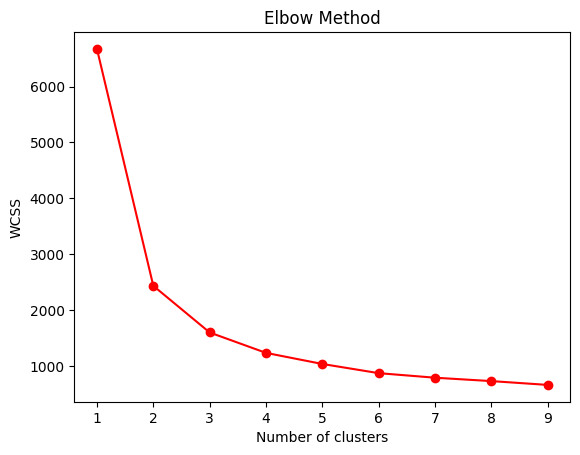

In [25]:
wcss = []
for i in range(1, 10):
    km = KMeans(n_clusters = i, init="k-means++", random_state = 42)
    km.fit(Normalisasi)
    wcss.append(km.inertia_)

plt.plot(np.arange(1, 10), wcss, marker='o', color='red')

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

plt.show()

Untuk grafik di atas, nilai K optimal adalah 3. Seperti yang kita lihat, dengan bertambahnya jumlah cluster, nilai WCSS menurun. Kami memilih nilai K berdasarkan tingkat penurunan WCSS. Misalnya, dari cluster 1 dan 2 pada grafik di atas kita melihat penurunan WCSS yang tiba-tiba dan sangat besar. Setelah 3 penurunannya minimal dan karenanya saya memilih 3 sebagai nilai optimal untuk K.

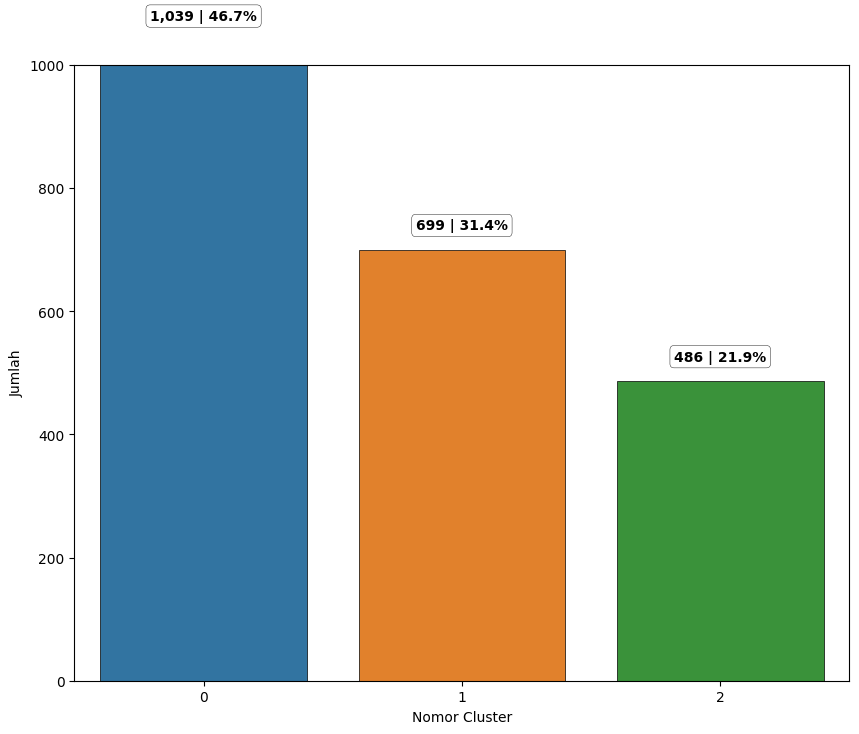

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of clusters
k = 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = kmeans.fit_predict(Normalisasi)

df['Cluster'] = labels
df1 = df[df['Cluster'] == 0]
df2 = df[df['Cluster'] == 1]
df3 = df[df['Cluster'] == 2]

# Returns a label for each data point based on the number of clusters
def setup_plot(X_label, y_label):
    plt.figure(figsize=(10, 8))
    plt.xlabel(X_label)
    plt.ylabel(y_label)
    return plt.gca()

# Create barplot with individual color for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # List of colors for each bar
cluster = sns.barplot(y=df['Cluster'].value_counts().values, x=df['Cluster'].value_counts().index, palette=colors, linewidth=0.5, ec='black', ax=setup_plot(X_label='Nomor Cluster', y_label='Jumlah'), zorder=2)

# Add labels
for p in cluster.patches:
    value = f'{p.get_height():,.0f} | {(p.get_height()/df.shape[0]):,.1%}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 40 
    cluster.text(x, y, value, ha='center', va='center', fontsize=10, color='black', fontweight='bold',
                 bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

# Set tinggi grafik
plt.gca().set_ylim(0, 1000)  # Mengatur batas y-axis dari 0 hingga 1000

plt.show()


Kode di atas melakukan clustering data menggunakan algoritma K-Means dengan 3 klaster. Setelah melakukan clustering, data dibagi menjadi beberapa klaster, dan kemudian diplot dalam bentuk barplot.

Berikut penjelasan rinci dari setiap bagian kode:

1. **Import Libraries**: Kode mengimpor modul-modul yang diperlukan, yaitu `seaborn` dan `matplotlib.pyplot`.

2. **K-Means Clustering**: Ditentukan jumlah klaster `k=3`, lalu dilakukan clustering menggunakan algoritma K-Means dengan `n_clusters=3`, inisialisasi menggunakan `k-means++`, dan menggunakan `random_state=42` untuk hasil yang dapat direproduksi. Hasil prediksi klaster disimpan dalam variabel `labels`.

3. **Pembagian Data**: Data dibagi menjadi beberapa DataFrame sesuai dengan klaster yang telah ditentukan, yaitu `df1`, `df2`, dan `df3`.

4. **Setup Plot Function**: Didefinisikan fungsi `setup_plot` untuk mengatur label sumbu x dan y pada plot. Plot akan dibuat dengan ukuran 10x8 inci.

5. **Barplot Creation**: Dibuat barplot menggunakan `sns.barplot()`. Setiap bar akan diberi warna yang berbeda sesuai dengan klaster. Variabel `cluster` menyimpan objek plot.

6. **Add Labels**: Ditambahkan label pada setiap bar. Label tersebut menunjukkan jumlah data pada setiap klaster.

7. **Set Tinggi Grafik**: Mengatur batas tinggi (y-axis) dari 0 hingga 1000.

8. **Show Plot**: Menampilkan plot.

Dari output visual diatas didapatkan : 
- cluster 1 dimana ini adalah client biasa memiliki jumlah 1.039 orang
- cluster 2 dimana ini adalah client potential memiliki jumlah 699 orang
- cluster 3 dimana ini adalah client bagus memiliki jumlah 486 orang

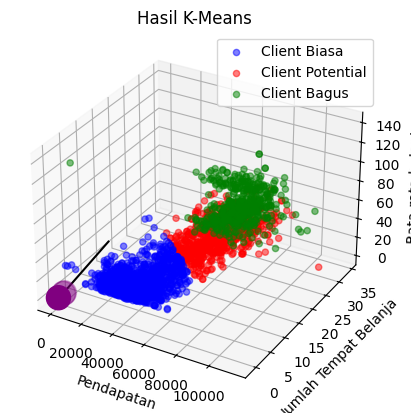

In [27]:
k_means_plot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
k_means_plot.plot3D(xline, yline, zline, 'black')

k_means_plot.scatter3D(df1.Income, df1.total_spend_place, df1['Rata-rata-belanja'],
                       c='blue', label='Client Biasa', alpha=0.5)
k_means_plot.scatter3D(df2.Income, df2.total_spend_place, df2['Rata-rata-belanja'],
                       c='red', label='Client Potential', alpha=0.5)
k_means_plot.scatter3D(df3.Income, df3.total_spend_place, df3['Rata-rata-belanja'],
                       c='green', label='Client Bagus', alpha=0.5)


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            color = 'purple', s = 300)
plt.legend()
k_means_plot.set_xlabel('Pendapatan')
k_means_plot.set_ylabel('Jumlah Tempat Belanja')
k_means_plot.set_zlabel('Rata-rata belanja')
plt.title("Hasil K-Means")
plt.show()

Kode di atas digunakan untuk membuat plot 3D dari hasil klasterisasi menggunakan algoritma K-Means. Berikut penjelasan rinci dari setiap bagian kode:

1. **Setup Plot 3D**: Membuat plot 3D menggunakan `plt.axes(projection='3d')`.

2. **Membuat Garis 3D**: Membuat garis 3D menggunakan `plot3D()` dengan garis berwarna hitam.

3. **Plot Scatter untuk Setiap Klaster**: Setiap klaster (`df1`, `df2`, `df3`) diplot dalam bentuk scatter 3D menggunakan `scatter3D()`. Warna setiap klaster ditentukan sesuai dengan labelnya. Label untuk masing-masing klaster juga ditambahkan untuk keterangan di legenda. 

4. **Plot Titik Tengah Klaster**: Menambahkan titik tengah klaster (centroid) menggunakan `scatter()`. Titik-titik ini merepresentasikan pusat dari masing-masing klaster dan diwarnai ungu.

5. **Menambahkan Legenda dan Label Sum bu**: Menambahkan legenda untuk menyatakan keterangan tiap warna klaster dan label-sumbu untuk masing-masing sumbu (pendapatan, jumlah tempat belanja, dan rata-rata belanja). 

6. **Menambahkan Judul**: Menambahkan judul untuk plot.

7. **Menampilkan Plot**: Plot ditampilkan menggunakan `plt.show()`.



In [28]:
import plotly.graph_objs as go

# Definisikan data untuk garis
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
line_trace = go.Scatter3d(x=xline, y=yline, z=zline, mode='lines', line=dict(color='black'), name='Line')

# Definisikan data untuk setiap cluster
scatter_traces = [
    go.Scatter3d(x=df1.Income, y=df1.total_spend_place, z=df1['Rata-rata-belanja'], mode='markers',
                 marker=dict(color='blue', size=5), name='Client Biasa'),
    go.Scatter3d(x=df2.Income, y=df2.total_spend_place, z=df2['Rata-rata-belanja'], mode='markers',
                 marker=dict(color='red', size=5), name='Client Potential'),
    go.Scatter3d(x=df3.Income, y=df3.total_spend_place, z=df3['Rata-rata-belanja'], mode='markers',
                 marker=dict(color='green', size=5), name='Client Bagus')
]

# Definisikan data untuk centroid
centroid_trace = go.Scatter3d(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],
                              z=kmeans.cluster_centers_[:,2], mode='markers',
                              marker=dict(color='purple', size=8), name='Centroids')

# Definisikan layout
layout = go.Layout(scene=dict(xaxis=dict(title='Pendapatan'), yaxis=dict(title='Kunjungan Tempat Belanja'), zaxis=dict(title='Rata-rata Belanja')),
                   margin=dict(l=0, r=0), height=800, width=800, title="Hasil K-Means", legend=dict(x=0, y=1))

# Definisikan figure
fig = go.Figure(data=[line_trace] + scatter_traces + [centroid_trace], layout=layout)

# Tampilkan plot
fig.show()


Kode di atas digunakan untuk membuat plot 3D menggunakan library Plotly. Berikut adalah penjelasan rinci dari setiap bagian kode:

1. **Definisi Data untuk Garis**: Data untuk garis yang akan ditambahkan ke plot 3D didefinisikan menggunakan `go.Scatter3d`. Garis ini akan memiliki mode 'lines' dan diberi warna hitam.

2. **Definisi Data untuk Setiap Klaster**: Data untuk setiap klaster (cluster) juga didefinisikan menggunakan `go.Scatter3d`. Setiap klaster akan direpresentasikan sebagai titik-titik dalam plot 3D. Warna dan ukuran titik-titik ini disesuaikan dengan klaster masing-masing.

3. **Definisi Data untuk Centroid**: Data untuk centroid dari masing-masing klaster juga didefinisikan sebagai titik-titik dalam plot 3D. Centroid ini direpresentasikan sebagai titik dengan ukuran dan warna tertentu.

4. **Definisi Layout**: Layout plot, termasuk sumbu-sumbu dan judul, didefinisikan menggunakan `go.Layout`.   dapat menyesuaikan parameter layout sesuai kebutuhan.

5. **Definisi Figure**: Figure plot 3D didefinisikan menggunakan `go.Figure`. Data yang telah didefinisikan sebelumnya untuk garis, setiap klaster, dan centroid dimasukkan ke dalam figure ini bersama dengan layout yang telah didefinisikan.

6. **Menampilkan Plot**: Plot 3D akhir ditampilkan menggunakan metode `show()` pada objek figure.



# **KESIMPULAN**

Dari hasil output dan visualisasi data 3d diatas, dapat disimpulkan bahwa : 

1. Cluster 1 - Client Biasa
   - Memiliki Income yang biasa dan cenderung rendah
   - Jarang keluar untuk belanja
   - Sedikit kurang dalam pengeluaran dalam belanja
2. Cluster 2 - Client Potential
   - Memiliki Income yang lumayan
   - Biasanya keluar untuk berbelanja tapi tidak terlalu sering
   - Pengeluaran yang normal untuk belanja
3. Cluster 3 - Client Bagus
   - Memiliki Income yang tinggi
   - Sering melakukan shopping
   - Pengeluaran yang tinggi dan jumlah belanja yang banyak